In [2]:
import pandas as pd
# Load self-report data
df_self_reports = pd.read_excel("C:/Users/vyache/Desktop/Questionnaire data_Ger.xlsx")  # Modify filename as needed
df_eng = pd.read_excel("C:/Users/vyache/Downloads/Features_German.xlsx")

# Merge with feature dataset (Ensure the key matches, e.g., 'Recording' and 'Speaker')
df_merged = pd.merge(df_eng, df_self_reports, on=["Recording", "Speaker"])

# Check the merged dataset
print(df_merged.head())

  Speaker   Recording  F0_sma_de_amean_mean  F0_sma_de_skewness_mean  \
0   Rec 1  SPEAKER_00             -0.025850                -0.020843   
1   Rec 1  SPEAKER_01              0.012883                -0.004928   
2   Rec 2  SPEAKER_00              0.015668                -0.006627   
3   Rec 2  SPEAKER_01              0.015564                 0.003007   
4   Rec 3  SPEAKER_00              0.024351                -0.007949   

   pcm_intensity_sma_amean_mean  pcm_intensity_sma_de_amean_mean  \
0                  3.964125e+00                         0.000005   
1                  2.577363e+10                    486969.725000   
2                  2.841074e+09                     67442.583333   
3                  3.052068e+00                    185303.337500   
4                  3.914474e+01                         0.018160   

   pcm_loudness_sma_amean_mean  pcm_loudness_sma_de_amean_mean  \
0                     0.713777                    7.939195e+00   
1                     0.65

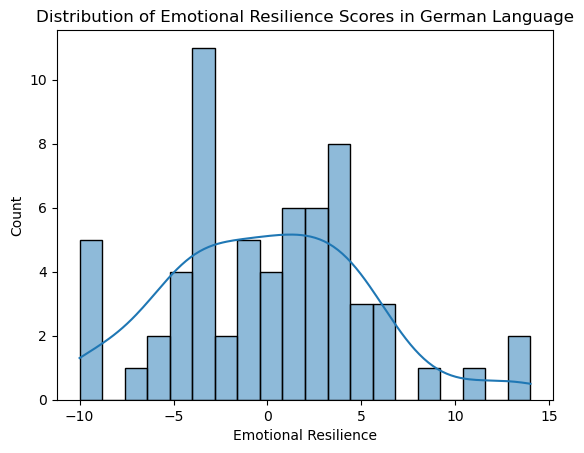

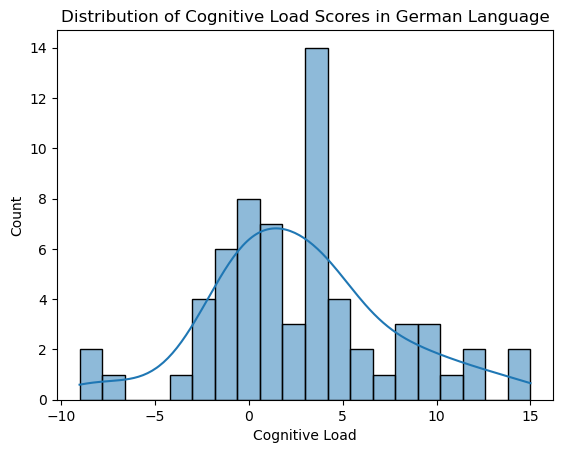

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Emotional Resilience Scores
sns.histplot(df_self_reports["Emotional Resilience"], kde=True, bins=20)
plt.title("Distribution of Emotional Resilience Scores in German Language")
plt.show()

# Plot Cognitive Load Scores
sns.histplot(df_self_reports["Cognitive Load"], kde=True, bins=20)
plt.title("Distribution of Cognitive Load Scores in German Language")
plt.show()


In [6]:
# Compute median thresholds
resilience_threshold = df_merged["Emotional Resilience"].median()
cognitive_load_threshold = df_merged["Cognitive Load"].median()

# Create binary labels
df_merged["high_resilience"] = (df_merged["Emotional Resilience"] >= resilience_threshold).astype(int)
df_merged["high_cognitive_load"] = (df_merged["Cognitive Load"] >= cognitive_load_threshold).astype(int)

print(df_merged[["Emotional Resilience", "high_resilience"]].head())
print(df_merged[["Cognitive Load", "high_cognitive_load"]].head())


   Emotional Resilience  high_resilience
0                     5                1
1                    -1                0
2                     1                1
3                     2                1
4                     4                1
   Cognitive Load  high_cognitive_load
0              -1                    0
1               5                    1
2               3                    1
3              -1                    0
4              -1                    0


In [8]:
# Define percentiles
low_threshold_resilience = df_self_reports["Emotional Resilience"].quantile(0.33)
high_threshold_resilience = df_self_reports["Emotional Resilience"].quantile(0.66)

low_threshold_load = df_self_reports["Cognitive Load"].quantile(0.33)
high_threshold_load = df_self_reports["Cognitive Load"].quantile(0.66)

# Categorize into 0 (Low), 1 (Medium), 2 (High)
def categorize_resilience(score):
    if score < low_threshold_resilience:
        return 0  # Low
    elif score < high_threshold_resilience:
        return 1  # Medium
    else:
        return 2  # High

def categorize_cognitive_load(score):
    if score < low_threshold_load:
        return 0  # Low
    elif score < high_threshold_load:
        return 1  # Medium
    else:
        return 2  # High

df_self_reports["resilience_category"] = df_self_reports["Emotional Resilience"].apply(categorize_resilience)
df_self_reports["cognitive_load_category"] = df_self_reports["Cognitive Load"].apply(categorize_cognitive_load)

print(df_self_reports["resilience_category"].value_counts())
print(df_self_reports["cognitive_load_category"].value_counts())



resilience_category
2    24
1    21
0    19
Name: count, dtype: int64
cognitive_load_category
2    25
1    25
0    14
Name: count, dtype: int64
